# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

In [10]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it's being processed (with the city number and city name).


#build URL query
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

#create lists to store API data
city_name = []
max_temp = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

index = 0
set = 1

print('Beginning Data Retrieval')  
print('-----------------------------')

# iterate through random cities and capture API data to store in the lists
for city in cities:

    try:
        
        response = requests.get(base_url + city).json()
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        index = index + 1
        set = set
        
        if index > 50:
            index = 1
            set += 1
        
        time.sleep(1)
       
        print(f"Processing Record {index} of Set {set} | {city}")
    
    except (KeyError, IndexError):
         print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | gerash
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | ambilobe
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | manokwari
Processing Record 9 of Set 1 | qaanaaq
Processing Record 10 of Set 1 | sabha
Processing Record 11 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 12 of Set 1 | thinadhoo
City not found. Skipping...
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | olga
Processing Record 16 of Set 1 | cocorit
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | husavik
Processing Record 22 of Set 1 

Processing Record 33 of Set 4 | sembakung
Processing Record 34 of Set 4 | taoudenni
Processing Record 35 of Set 4 | santo angel
City not found. Skipping...
Processing Record 36 of Set 4 | general roca
Processing Record 37 of Set 4 | nanortalik
Processing Record 38 of Set 4 | karratha
Processing Record 39 of Set 4 | san cristobal
Processing Record 40 of Set 4 | kruisfontein
Processing Record 41 of Set 4 | shimoda
City not found. Skipping...
Processing Record 42 of Set 4 | salalah
Processing Record 43 of Set 4 | fairbanks
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | khao wong
Processing Record 46 of Set 4 | kodiak
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | trelew
Processing Record 49 of Set 4 | poronaysk
Processing Record 50 of Set 4 | haines junction
Processing Record 1 of Set 5 | banfora
Processing Record 2 of Set 5 | imatra
City not found. Skipping...
Processing Record 3 of Set 5 | zhigansk
Processing Record 4 of Set 5 | mogadishu

Processing Record 21 of Set 8 | souillac
Processing Record 22 of Set 8 | san pedro
Processing Record 23 of Set 8 | gavle
Processing Record 24 of Set 8 | gornozavodsk
Processing Record 25 of Set 8 | cockburn town
Processing Record 26 of Set 8 | manicore
Processing Record 27 of Set 8 | necocli
Processing Record 28 of Set 8 | upernavik
Processing Record 29 of Set 8 | laramie
Processing Record 30 of Set 8 | kuala terengganu
Processing Record 31 of Set 8 | montepuez
Processing Record 32 of Set 8 | uptar
Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | nishihara
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | kailua
Processing Record 37 of Set 8 | orotukan
Processing Record 38 of Set 8 | camopi
Processing Record 39 of Set 8 | san ramon
Processing Record 40 of Set 8 | meulaboh
Processing Record 41 of Set 8 | aranos
Processing Record 42 of Set 8 | shieli
Processing Record 43 of Set 8 | emirdag
Processing Record 44 of Set 8 | saint-francois
City not 

In [14]:
#Create a dataframe to house raw data
weather_data = {
    'City': city_name,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}
weather_df = pd.DataFrame(weather_data)

# Save Data to csv
weather_df.to_csv("WeatherPy_Output.csv")

weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,73.99,54,100,15.01,NZ,1611694499
1,Gerāsh,27.6652,54.1371,46.40,46,0,1.99,IR,1611694274
2,Carnarvon,-24.8667,113.6333,69.80,73,8,20.71,AU,1611694211
3,Arraial do Cabo,-22.9661,-42.0278,84.20,65,0,17.27,BR,1611694505
4,Ambilobe,-13.2000,49.0500,75.81,90,78,1.12,MG,1611694334


In [15]:
weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,5.430000e+02
mean,17.104071,16.866543,51.983260,73.169429,57.484346,8.959963,1.611695e+09
std,33.660343,91.539691,31.777219,19.603374,39.820020,6.503284,1.986117e+02
min,-54.800000,-175.200000,-52.960000,7.000000,0.000000,0.090000,1.611694e+09
25%,-11.804050,-64.908650,31.265000,64.000000,16.000000,3.890000,1.611695e+09
50%,20.198600,21.242100,64.400000,78.000000,75.000000,7.340000,1.611695e+09
75%,44.576950,97.584150,77.000000,86.000000,97.000000,12.180000,1.611695e+09
max,78.218600,178.416700,102.360000,100.000000,100.000000,36.910000,1.611695e+09


 ## Latitude vs. Temperature Plot

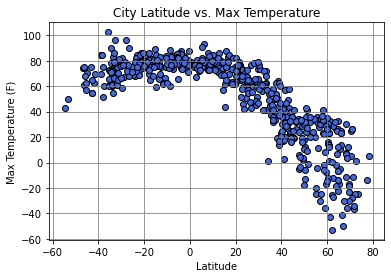

In [31]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Max Temperature"]

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_temp.png')
plt.show()

### Analysis:
    - The closer to the equator the higher the temperature will be in those cities.

## Latitude vs. Humidity Plot

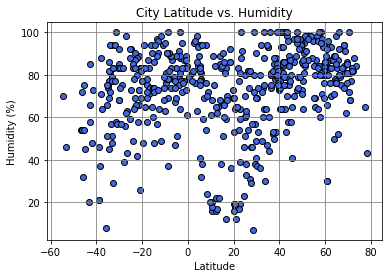

In [32]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_humidity.png')
plt.show()

### Analysis:
    - The humidity level varies worldwide with a majority of cities being above 60% but no correlation to the equator can be made.

 ## Latitude vs. Cloudiness Plot

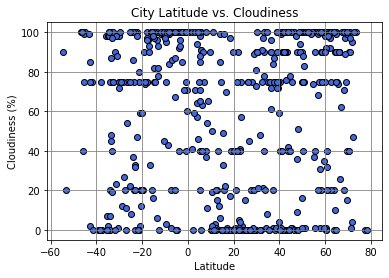

In [35]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Cloudiness"]

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_cloudiness.png')
plt.show()

### Analysis:
    - Most cities experience either 100% cloudy or 0% with no significant correlation to the equator.

 ## Latitude vs. Wind Speed Plot

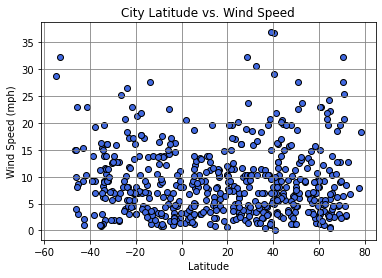

In [36]:
#Label axis
x_axis = weather_df["Latitude"]
y_axis = weather_df["Wind Speed"]

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")
plt.grid(b=True, which='major', axis='both', color='gray', linestyle='-')

#Save image and print
plt.savefig('Lat_vs_windspeed.png')
plt.show()

### Analysis:
    - A majority of the cities experience between 0 and 15 mph wind gusts, there is no correlation in latitude or the distance from the equator.

 ## Linear Regression

In [55]:
northern_hem_df = weather_df.loc[(weather_df['Latitude']) > 0, :]
northern_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,Gerāsh,27.6652,54.1371,46.40,46,0,1.99,IR,1611694274
5,Guerrero Negro,27.9769,-114.0611,62.04,46,0,18.88,MX,1611694508
6,Dikson,73.5069,80.5464,-24.54,84,100,6.80,RU,1611694509
8,Qaanaaq,77.4840,-69.3632,-13.68,65,0,7.85,GL,1611694511
9,Sabha,27.0377,14.4283,60.48,31,0,10.00,LY,1611694512


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8685988789764806


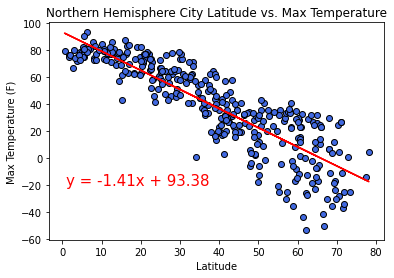

In [57]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Max Temperature"]

plt.title("Northern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(1,-20),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_temp_north_reg.png')
plt.show()

In [58]:
southern_hem_df = weather_df.loc[(weather_df['Latitude']) < 0, :]
southern_hem_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,73.99,54,100,15.01,NZ,1611694499
2,Carnarvon,-24.8667,113.6333,69.80,73,8,20.71,AU,1611694211
3,Arraial do Cabo,-22.9661,-42.0278,84.20,65,0,17.27,BR,1611694505
4,Ambilobe,-13.2000,49.0500,75.81,90,78,1.12,MG,1611694334
7,Manokwari,-0.8667,134.0833,77.16,83,100,2.28,ID,1611694323


 ## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.41637653419805054


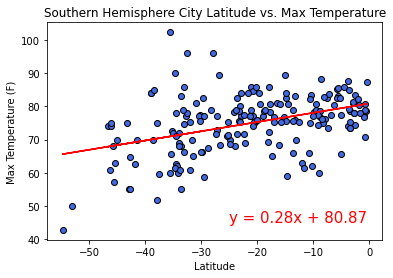

In [59]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Max Temperature"]

plt.title("Southern Hemisphere City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_temp_south_reg.png')
plt.show()

### Analysis:
    - The cities in the northern hemisphere have a more significant regression in temperature the farther you move north from the equator than cities in the southern hemisphere.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.32720597797806167


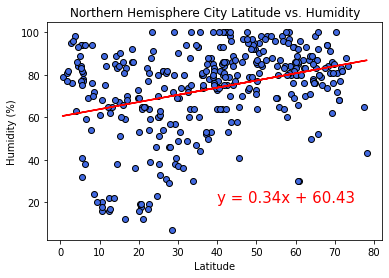

In [61]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Humidity"]

plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_humidity_north_reg.png')
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37674729157119224


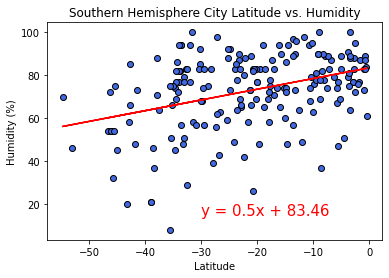

In [64]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Humidity"]

plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_humidity_south_reg.png')
plt.show()

### Analysis:
    - 

 ## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.257895478502038


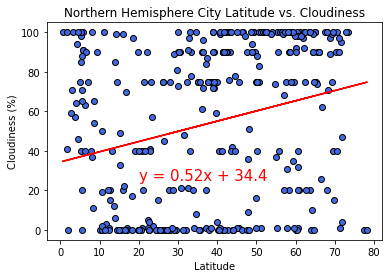

In [67]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Cloudiness"]

plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_cloudiness_north_reg.png')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2437806189699932


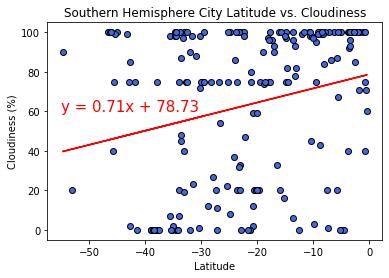

In [71]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Cloudiness"]

plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_cloudiness_south_reg.png')
plt.show()

### Analysis:
    - 

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09121301587916643


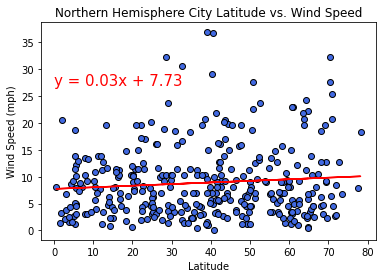

In [76]:
#Label axis
x_axis = northern_hem_df["Latitude"]
y_axis = northern_hem_df["Wind Speed"]

plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_windspeed_north_reg.png')
plt.show()

 ## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24050901915954906


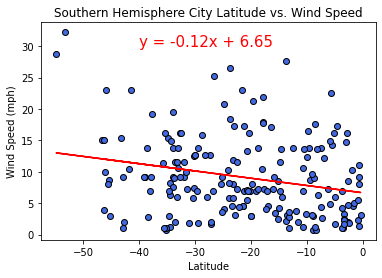

In [79]:
#Label axis
x_axis = southern_hem_df["Latitude"]
y_axis = southern_hem_df["Wind Speed"]

plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Add linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

#Plot graph
plt.scatter(x_axis, y_axis, marker="o", color="royalblue", edgecolors="black")

#Save image and print
print(f"The r-value is: {rvalue}")
plt.savefig('Lat_vs_windspeed_south_reg.png')
plt.show()

### Analysis:
    - 